**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)   # to see all columns
import matplotlib.pyplot as plt
import seaborn as sns

**Load dataset**

In [ ]:
df = pd.read_excel('/content/Q4.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

**Data cleaning**

In [ ]:
# Remove CustomerID
df.drop('CustomerID', axis = 1, inplace = True)

In [ ]:
# Show percentage of missig values for each column
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
Churn                          0.000000
MaritalStatus                  0.000000
Complain                       0.000000
NumberOfAddress                0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
NumberOfDeviceRegistered       0.000000
Gender                         0.000000
PreferredPaymentMode           0.000000
CityTier                       0.000000
PreferredLoginDevice           0.000000
CashbackAmount                 0.000000
dtype: float64

In [ ]:
# As mobile phone and phone are both same so we have merged them
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'

In [ ]:
# COD is Cash on Delivery only and CC is credit card, therefore we have merged them
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [ ]:
# For PreferedOrderCat, change "Mobile" to "Mobile Phone"
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

**Some EDA**

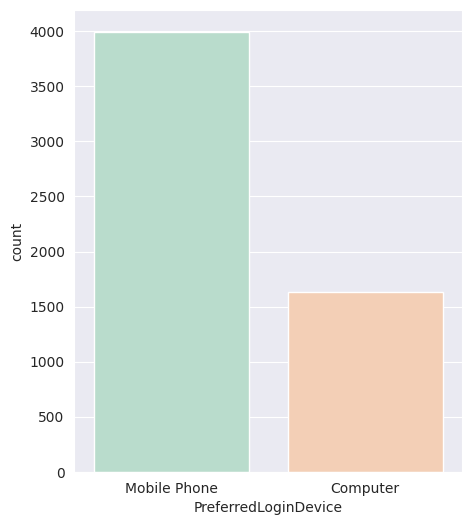

In [ ]:
# Most of the customer use Mobile phone as login device
plt.figure(figsize = (5,6))
sns.set_style('darkgrid')
sns.countplot(x  = 'PreferredLoginDevice',  data = df, palette = 'Pastel2');

In [ ]:
# Maximum number of transcation done by debit card and credit card and small portion of payment done by UPI
df1  =df['PreferredPaymentMode'].value_counts().reset_index()
df1.columns = ['mode', 'count']
df1

import plotly.express as px
fig = px.treemap(df1, path = ['mode'],
                 values = 'count', 
                 color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

**Feature Engineering**

In [ ]:
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

numerical_cols = ['Churn', 'Tenure',  'CityTier',
       'WarehouseToHome',  'HourSpendOnApp',
       'NumberOfDeviceRegistered',  'SatisfactionScore',
        'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'mean')      
imputer.fit(df[numerical_cols])
df[numerical_cols] = imputer.transform(df[numerical_cols])

In [ ]:
# checking the null value
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
# Scaling the numerical feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numerical_cols])
df[numerical_cols] = scaler.transform(df[numerical_cols])

**Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
encoder.fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)
df[encoded_cols] = encoder.transform(df[categorical_cols])

['PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
df[encoded_cols]

,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5626,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5628,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Now merged the variable and form the input variable and target variable
X = df[numerical_cols + encoded_cols]
X.drop('Churn', axis =1, inplace = True)
X

<ipython-input-278-ea1802598bae>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.065574,1.0,0.008197,0.600000,0.4,0.25,0.380952,1.0,0.000000,0.0625,0.000000,0.108696,0.492107,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.167048,0.0,0.024590,0.600000,0.6,0.50,0.285714,1.0,0.266667,0.0000,0.000000,0.000000,0.372011,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.167048,0.0,0.204918,0.400000,0.6,0.50,0.238095,1.0,0.200000,0.0000,0.000000,0.065217,0.370104,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000000,1.0,0.081967,0.400000,0.6,1.00,0.333333,0.0,0.800000,0.0000,0.000000,0.065217,0.412536,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.057377,0.586307,0.4,1.00,0.095238,0.0,0.000000,0.0625,0.000000,0.065217,0.398782,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.163934,0.0,0.204918,0.600000,0.2,0.00,0.238095,0.0,0.466667,0.0625,0.066667,0.086957,0.463737,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5626,0.213115,0.0,0.065574,0.600000,0.8,1.00,0.238095,0.0,0.333333,0.0625,0.066667,0.098772,0.692052,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.016393,0.0,0.049180,0.600000,0.2,0.75,0.095238,1.0,0.666667,0.0625,0.066667,0.086957,0.573618,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5628,0.377049,1.0,0.032787,0.800000,0.8,0.75,0.142857,0.0,0.266667,0.1250,0.066667,0.195652,0.550478,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# y is a target variable
y = df['Churn']
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5625    0.0
5626    0.0
5627    0.0
5628    0.0
5629    0.0
Name: Churn, Length: 5630, dtype: float64

**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix ,precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

# Using RandomForest as the classifier, for example
dTree =  RandomForestClassifier(max_depth=3, random_state=42)
dTree.fit(X_train, y_train)

pred_train = dTree.predict(X_train)
pred_test = dTree.predict(X_test)

In [ ]:
confusion_matrix(pred_test, y_test)

array([[941, 175],
       [  0,  10]])

In [ ]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.844582593250444, 0.844582593250444)

In [ ]:
round(precision_score(pred_test, y_test),4), round(recall_score(pred_test, y_test),4)

(0.0541, 1.0)

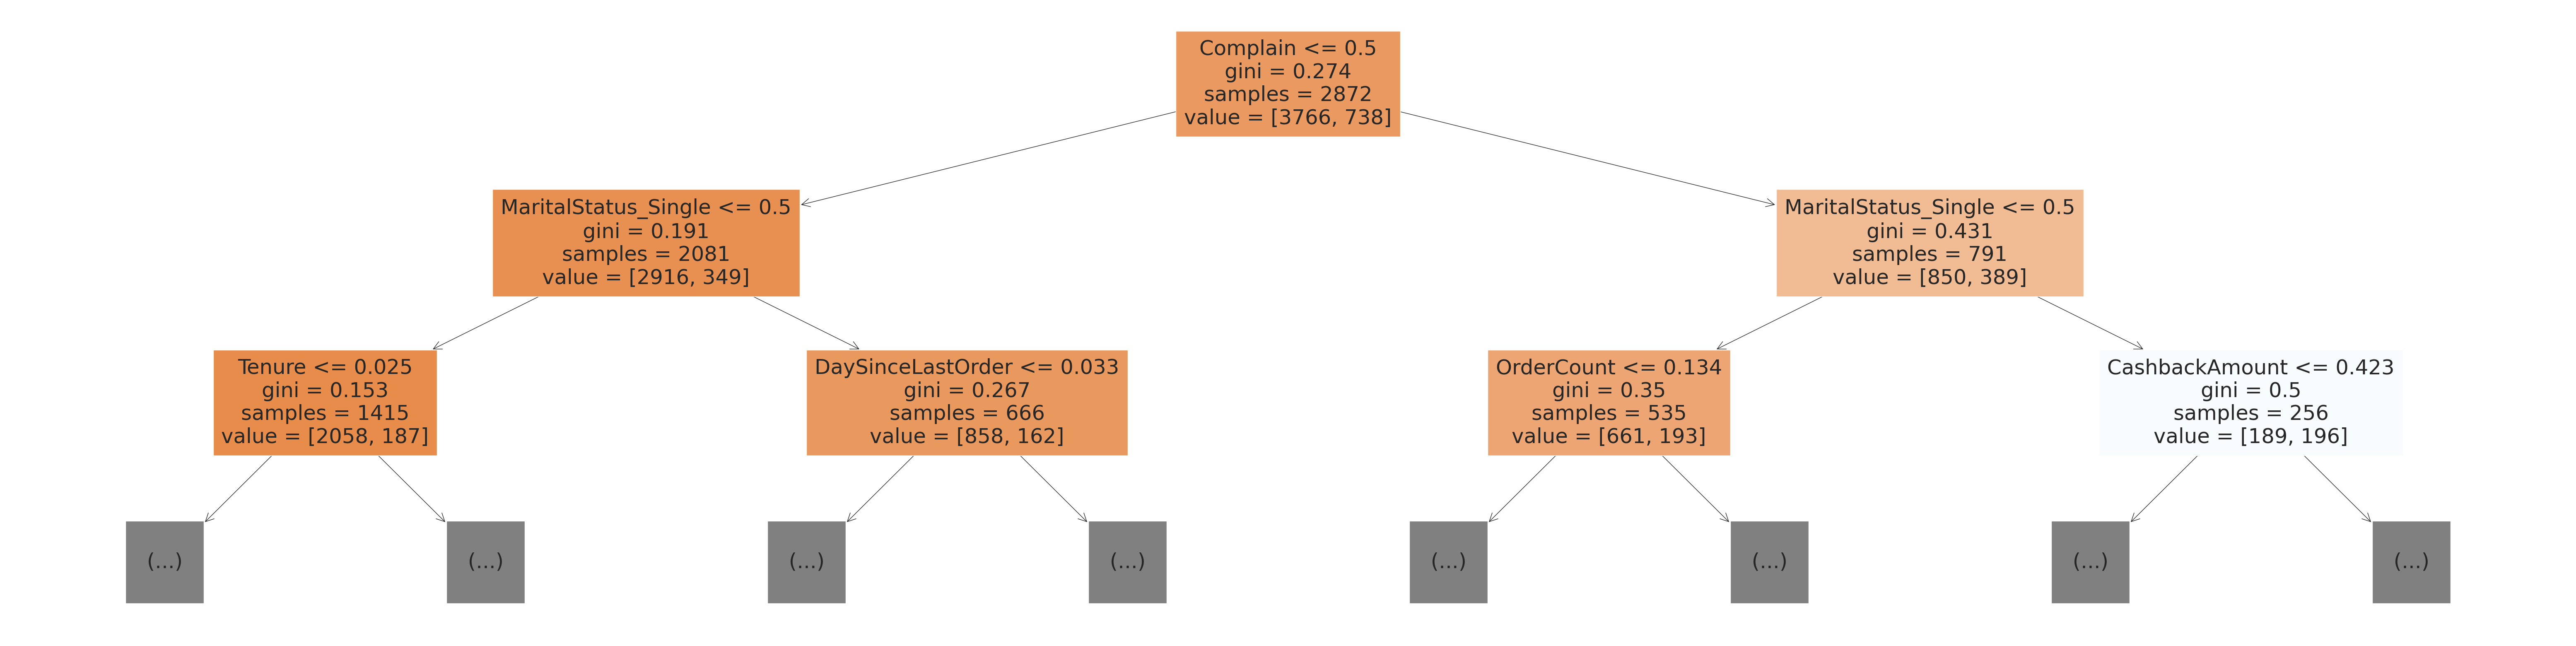

In [ ]:
# Tree visualization
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))      # mention the plot size to be use
dTree.estimators_[99]   # taking the 100th decision tree 
plot_tree(dTree.estimators_[99], feature_names = X_train.columns, max_depth =2 , filled = True);   

**Show Feature Importance**

In [ ]:
importance_df = pd.DataFrame({'feature':X_train.columns,
                            'Importance': dTree.feature_importances_}).sort_values('Importance', ascending = False)
importance_df.head(10)

,feature,Importance
0,Tenure,0.444982
7,Complain,0.168405
25,PreferedOrderCat_Mobile Phone,0.073267
11,DaySinceLastOrder,0.066072
12,CashbackAmount,0.057652
29,MaritalStatus_Single,0.048555
28,MaritalStatus_Married,0.028715
6,NumberOfAddress,0.014567
5,SatisfactionScore,0.013235
4,NumberOfDeviceRegistered,0.013023


Text(0.5, 1.0, 'Feature Importance')

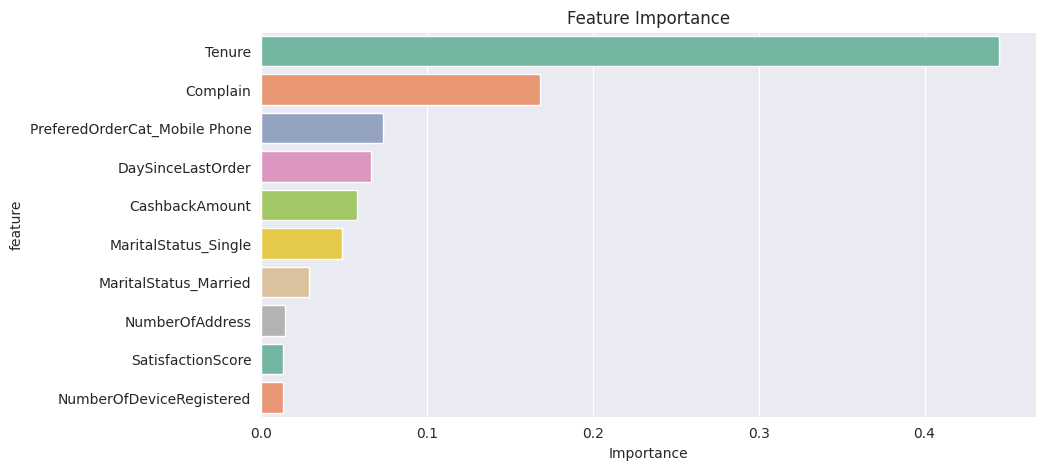

In [ ]:
plt.figure(figsize=(10,5))

sns.barplot(data = importance_df.head(10), x = 'Importance', y = 'feature', palette = 'Set2');
plt.title('Feature Importance')

**Question: Any sales / marketing strategies?**

Some suggested answers:
1. Tenure is the most important factor. We should convinec our customers to sign for a longer contract
2. Reduce number of customer complaints by providing better customer services